#Word2Vec: A gentle Introduction
It is a word embedding technique used particularly while handling text data for NLP related tasks.

`word embedding` :Representing text in form of real valued vector such that words that are closer in vector space are expected to be similar in meaning.

Introduced by `Google` in 2013 ( <a href="https://arxiv.org/pdf/1301.3781.pdf
"> View research Paper</a> )

Key features of word2vec:

1.Semantic meaning

2.Low dimension(generally 200-300 dimension) as compared to One Hot encoding,bag of words,ngram or Tf-Idf etc.

3.We will get a dense vector(so overfitting problem will be reduced)


In [1]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

In [5]:
!pip install wget

In [13]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
# data available at https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300

--2024-03-17 05:43:49--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.194.128, 54.231.131.0, 52.217.225.104, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.194.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-17 05:43:49 ERROR 404: Not Found.



In this notebook we will use the pre-trained weights of word2vec that was trained on Google New corpus containing 3 billion words. This model consists of 300-dimensional vectors for 3 million words and phrases.

#Word2Vec Theory
Intution: How are words related?

below image relates some words with some features

for eg.(King - Man + woman) will approximately represent queen's column



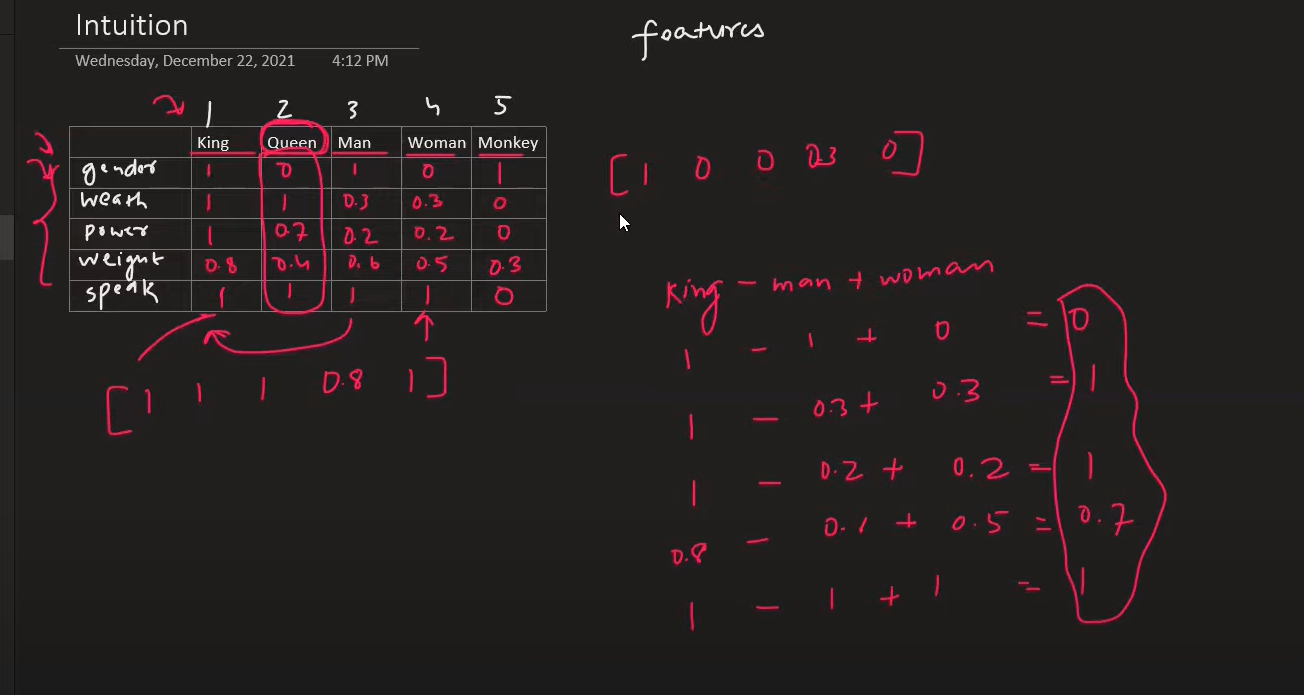

The underlying assumption of word2vec is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model.

Types of Word2Vec : both are shallow neural networks(not too much layers)

1.`CBOW`: continuous bag of words

2.`Skip Gram`

#Architecutre of word2vec:
### 1.CBOW

We can not directly convert word 2 vec so we create a fake problem and try to solve this problem and we try to solve this dummy problem.

How to solve this dummy problem?

Assume bag of 3 words middle word will be target and first and last words of bag will be features.
This is our training data.

Suppose we have five word sentence `watch campusx for data science`
Apply OHE on this five words so we get 5*5 identity matrix.

Now train this data on neural network: In input layer we'll have 10 Nodes,hidden layer will have 3 nodes(as we decided 3 as size of bow) and output will have 5 nodes. This neural network will be complete(full connected)

We will apply softmax on below neural network(in input first five nodes represents `watch` and next five represents `for` and output layer's five nodes represents `campusx`).
Use loss function and backpropagation.

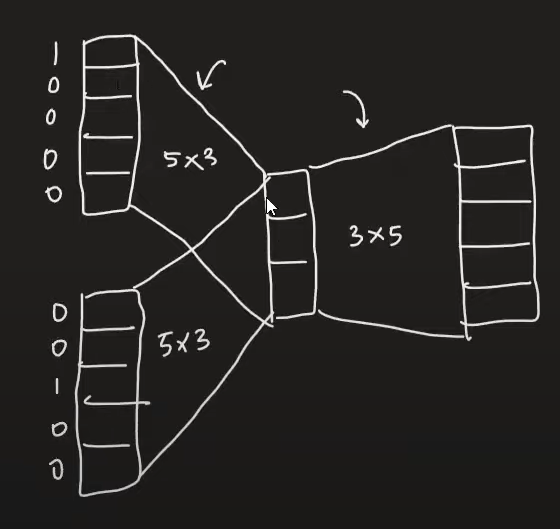

###2.Skip-Gram
Reverse dummy problem of CBOW(input is middle word and output is first and third word for a size 3 groupings). So Neural network will have 5 neurons in input same 3 neurons in hidden layer and 10 neurons in output.

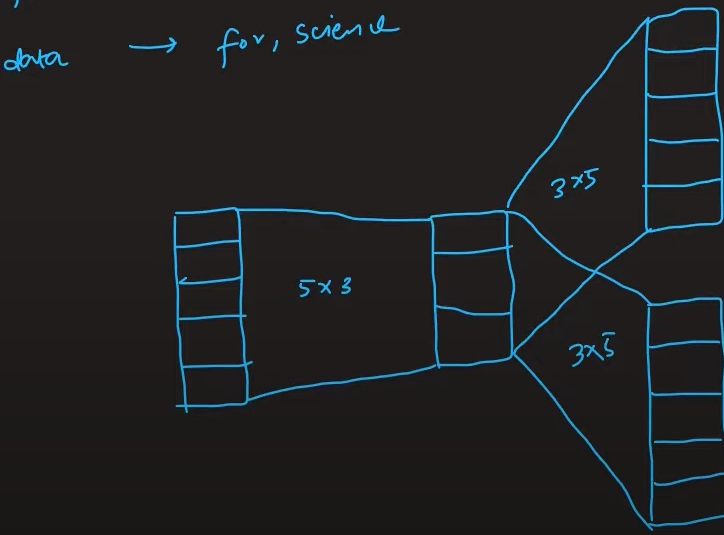



##When to use which model?
if you are working on small dataset use `CBOW` and for large dataset use `Skip Gram`

###How can you improve model performance?
Increase training dataset,Increase the dimension of data,Increase window size

But everything comes at cost😅(and here that cost is computation power)

In [ ]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True,limit=500000)

In [ ]:
model['cricket'] #shape of dataset: 30 lakh words * 300 dimnesion vector
#we can perform various operations on vectors like similarity b/w 2 vectors(cosine similarity),adding two vectors etc.

array([-3.67187500e-01, -1.21582031e-01,  2.85156250e-01,  8.15429688e-02,
        3.19824219e-02, -3.19824219e-02,  1.34765625e-01, -2.73437500e-01,
        9.46044922e-03, -1.07421875e-01,  2.48046875e-01, -6.05468750e-01,
        5.02929688e-02,  2.98828125e-01,  9.57031250e-02,  1.39648438e-01,
       -5.41992188e-02,  2.91015625e-01,  2.85156250e-01,  1.51367188e-01,
       -2.89062500e-01, -3.46679688e-02,  1.81884766e-02, -3.92578125e-01,
        2.46093750e-01,  2.51953125e-01, -9.86328125e-02,  3.22265625e-01,
        4.49218750e-01, -1.36718750e-01, -2.34375000e-01,  4.12597656e-02,
       -2.15820312e-01,  1.69921875e-01,  2.56347656e-02,  1.50146484e-02,
       -3.75976562e-02,  6.95800781e-03,  4.00390625e-01,  2.09960938e-01,
        1.17675781e-01, -4.19921875e-02,  2.34375000e-01,  2.03125000e-01,
       -1.86523438e-01, -2.46093750e-01,  3.12500000e-01, -2.59765625e-01,
       -1.06933594e-01,  1.04003906e-01, -1.79687500e-01,  5.71289062e-02,
       -7.41577148e-03, -

In [ ]:
model.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903800010681),
 ('girl', 0.5921714305877686),
 ('robber', 0.5585119128227234),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116),
 ('guy', 0.5420035123825073),
 ('person', 0.5342026352882385)]

In [ ]:
model.most_similar('cricket')

[('cricketing', 0.8372225165367126),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094818592071533),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624266147613525),
 ('Cricket', 0.7541396617889404),
 ('cricketer', 0.7372579574584961),
 ('West_Indies_cricket', 0.698798656463623),
 ('Cricket_Board', 0.687838613986969),
 ('ODI', 0.6851663589477539)]

In [ ]:
model.most_similar('facebook')

[('Facebook', 0.7563532590866089),
 ('twitter', 0.6988551616668701),
 ('Twitter', 0.6642444729804993),
 ('Facebook.com', 0.6529868245124817),
 ('facebook.com', 0.6135972142219543),
 ('Twitter.com', 0.6102107763290405),
 ('Myspace', 0.5829181671142578),
 ('Youtube', 0.5796945095062256),
 ('social_networking', 0.5592854022979736),
 ('social_networking_sites', 0.5527533292770386)]

In [ ]:
model.similarity('man','woman')

0.76640123

In [ ]:
model.similarity('man','PHP')

-0.032995153

In [ ]:
model.doesnt_match(['PHP','java','monkey'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'monkey'

In [ ]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.6454660892486572),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('queens', 0.5289887189865112),
 ('ruler', 0.5247419476509094)]

In [ ]:
vec = model['INR'] - model ['India'] + model['England']
model.most_similar([vec])

[('INR', 0.6442340612411499),
 ('GBP', 0.5040826201438904),
 ('England', 0.44649264216423035),
 ('£', 0.43340998888015747),
 ('Â_£', 0.430719792842865),
 ('£_#.##m', 0.42561304569244385),
 ('Pounds_Sterling', 0.42512616515159607),
 ('GBP##', 0.42464494705200195),
 ('stg', 0.42324796319007874),
 ('£_#.###m', 0.4201711118221283)]